In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
#this will print the first 5 correct detection classes in number vise but we need to convert it into a 1D array to do so:-
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [12]:
def plot_samples(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

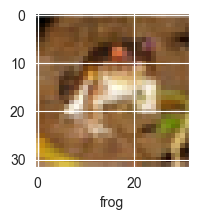

In [13]:
plot_samples(X_train,y_train,0)

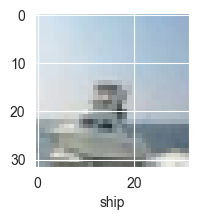

In [16]:
plot_samples(X_train,y_train,100)

In [17]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [19]:
X_train=X_train/255
X_test=X_test/255


In [24]:
 #here we scaled the values as in the dataset itself is based on 256 rgb grad hence we just divide 255 to get the scaled amount
 #WE WILL FIRST MAKE A ANN CLASSIFICATION THEN CNN TO JUDGE WHICH ONE IS GOOD
 from tensorflow import keras

In [27]:
#Now we will be creating an ANN: Artificial Neural Network using keras sequential model
model=keras.Sequential([
    #since we do have this data into a matrix and we need this into a flattened 1D array hence to do it we will use keras flattening APIs
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    #For the output layer of 10 final classification outputs
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3540 - loss: 1.8110
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4283 - loss: 1.6218
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4540 - loss: 1.5430
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4786 - loss: 1.4821
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4944 - loss: 1.4341


In [32]:
#we can see there is very less accuracy using ANN
#we may also try the same with test dataset
model.evaluate(X_test,y_test)
#same low accuracy is observed in ANN

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4803 - loss: 1.4529


[1.452924370765686, 0.48030000925064087]

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np. argmax (element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.65      0.56      1000
           1       0.52      0.71      0.60      1000
           2       0.44      0.21      0.29      1000
           3       0.31      0.50      0.38      1000
           4       0.41      0.47      0.43      1000
           5       0.51      0.24      0.33      1000
           6       0.47      0.61      0.53      1000
           7       0.61      0.48      0.53      1000
           8       0.61      0.61      0.61      1000
           9       0.69      0.31      0.43      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [36]:
#now using CNN
cnn=keras.Sequential([
    #CNN layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #Dense Networks
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4788 - loss: 1.4465
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6163 - loss: 1.0889
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6680 - loss: 0.9510
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6984 - loss: 0.8689
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7221 - loss: 0.8032


In [37]:
#BINGOO-----> we got 0.72 accuracy which is far better then using ANN
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6859 - loss: 0.9217


[0.9216917753219604, 0.6858999729156494]